In [62]:
import requests
from textblob import TextBlob as tb
import pandas as pd 
import matplotlib.pyplot as plt
#from nltk 
# Replace 'YOUR_API_KEY' with your actual News API key
API_KEY =  "9ceb49af13804ea88cb9d1bf268b02a7"
NEWS_API_URL = 'https://newsapi.org/v2/everything'

In [63]:
def analyze_company_sentiment(api_key, company_name):
    # Query for news articles related to the company
    query = f'{company_name} news'
    params = {
        'q': query,
        'apiKey': api_key
    }
    response = requests.get(NEWS_API_URL, params=params)
    data = response.json()
    articles = data.get('articles', [])

    # Analyze sentiment of headlines for the company
    sentiments = []
    for article in articles:
        text = article['title']
        blob = tb(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        sentiments.append({'headline': text, 'polarity': polarity, 'subjectivity': subjectivity})
    return sentiments


In [64]:
# Here I used another function to pull all company sentiments in a dictionary.
def analyze_companies_sentiment(api_key, companies):
    results = {}
    for company in companies:
        company_sentiments = analyze_company_sentiment(api_key, company)
        results[company] = company_sentiments
    return results
        

In [65]:
companies = ['Apple', 'Microsoft', 'Google']  # Add more companies as needed 


# Analyze sentiment for the list of companies
sentiment_results = analyze_companies_sentiment(API_KEY, companies)

# Store each company's data in a separate variable
apple_sentiments = sentiment_results['Apple']
microsoft_sentiments = sentiment_results['Microsoft']
google_sentiments = sentiment_results['Google']

<h3>Polarity:</h3>

<p style="font-size: smaller;">
Polarity refers to the emotional tone of the text, indicating whether the expressed opinion or sentiment is positive, negative, or neutral.
Positive polarity: Indicates a positive sentiment (e.g., happiness, approval).
Negative polarity: Indicates a negative sentiment (e.g., sadness, disapproval).
Neutral polarity: Indicates a lack of strong sentiment, often factual or objective statements.
</p>

<h3>Subjectivity:</h3>

<p style="font-size: smaller;">
Subjectivity measures how subjective or objective the text is. Subjective text expresses personal opinions, emotions, or judgments, while objective text presents factual information without personal feelings.
0 indicates highly objective or factual content.
1 indicates highly subjective or opinionated content.
</p>


In [66]:
company_dataframes = {}

# Iterate through each company and create a DataFrame for its sentiment analysis results
for company, sentiments in sentiment_results.items():
    company_dataframes[company] = pd.DataFrame(sentiments)

# Print the first few rows of each company's DataFrame
for company, dataframe in company_dataframes.items():
    print(f'Sentiment Analysis Results for {company}:')
    print(dataframe.head())
    print('\n')

Sentiment Analysis Results for Apple:
                                            headline      polarity  \
0  iFixit has good news and bad news about the iP...  5.551115e-17   
1  iPhone 15 event: all the news on Apple’s new p...  1.363636e-01   
2  Everything announced at today's Apple event: i...  5.000000e-01   
3  Engadget Podcast: Diving into the iPhone 15 an...  0.000000e+00   
4  Assassin's Creed Mirage, Death Stranding and R... -1.000000e+00   

   subjectivity  
0      0.633333  
1      0.454545  
2      0.500000  
3      0.000000  
4      1.000000  


Sentiment Analysis Results for Microsoft:
                                            headline  polarity  subjectivity
0  How to watch and follow Thursday’s Microsoft S...       0.0           0.0
1        Panos Panay is leaving Microsoft for Amazon       0.0           0.0
2  Everything Microsoft announced at its Surface ...       0.0           0.0
3  Phil Spencer says acquiring Nintendo would be ...       0.0           0.0
4  M

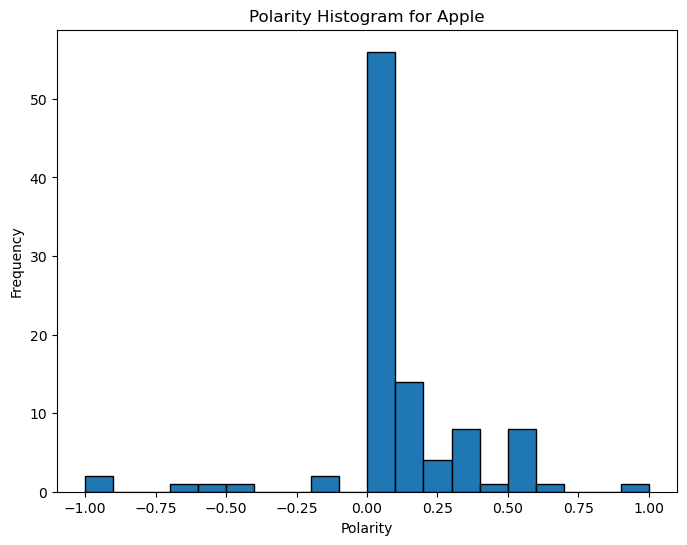

Sentiment Analysis Results for Apple:
                                            headline      polarity  \
0  iFixit has good news and bad news about the iP...  5.551115e-17   
1  iPhone 15 event: all the news on Apple’s new p...  1.363636e-01   
2  Everything announced at today's Apple event: i...  5.000000e-01   
3  Engadget Podcast: Diving into the iPhone 15 an...  0.000000e+00   
4  Assassin's Creed Mirage, Death Stranding and R... -1.000000e+00   

   subjectivity  
0      0.633333  
1      0.454545  
2      0.500000  
3      0.000000  
4      1.000000  




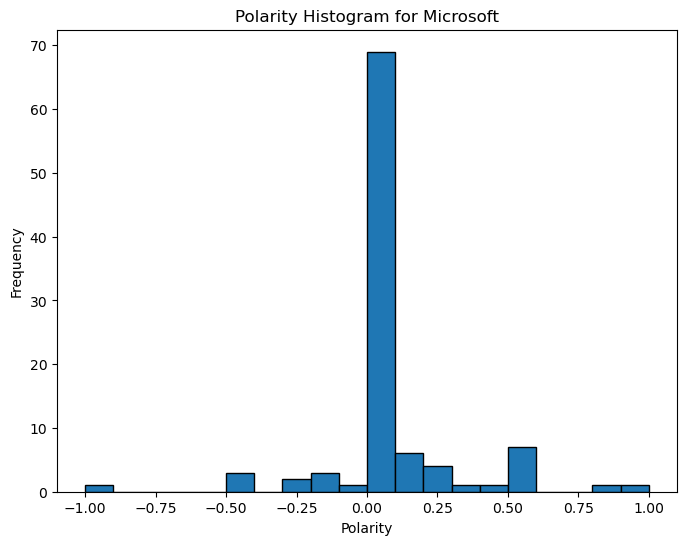

Sentiment Analysis Results for Microsoft:
                                            headline  polarity  subjectivity
0  How to watch and follow Thursday’s Microsoft S...       0.0           0.0
1        Panos Panay is leaving Microsoft for Amazon       0.0           0.0
2  Everything Microsoft announced at its Surface ...       0.0           0.0
3  Phil Spencer says acquiring Nintendo would be ...       0.0           0.0
4  Microsoft Surface event: the 6 biggest announc...       0.0           0.0




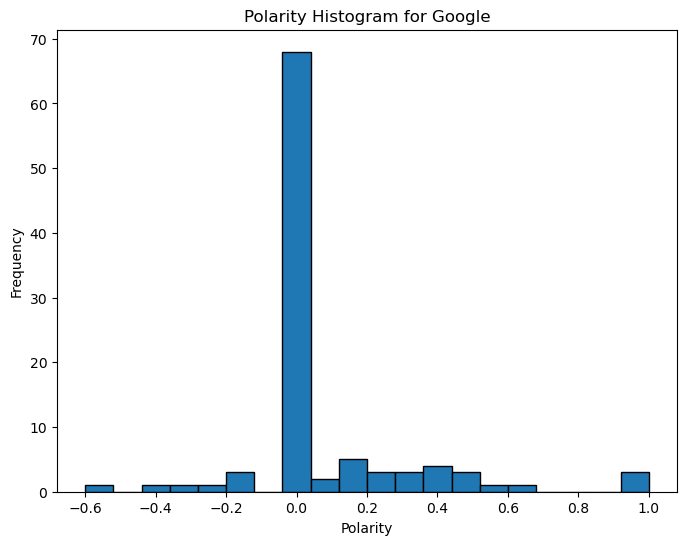

Sentiment Analysis Results for Google:
                                            headline  polarity  subjectivity
0             How to watch Google unveil the Pixel 8       0.0           0.0
1  The Google Pixel Fold’s dual-screen interprete...       0.0           0.0
2  The Google Nest Hub Max will no longer support...       0.0           0.0
3  The Truth About the Taylor Swift, Jets Game, G...      -0.4           0.4
4                How to Watch Google's Pixel 8 Event       0.0           0.0




In [67]:
for company, sentiments in sentiment_results.items():
    company_dataframes[company] = pd.DataFrame(sentiments)
    
    # Plot polarity histogram for the current company
    plt.figure(figsize=(8, 6))
    plt.hist(company_dataframes[company]['polarity'], bins=20, edgecolor='black')
    plt.title(f'Polarity Histogram for {company}')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Print the first few rows of the DataFrame
    print(f'Sentiment Analysis Results for {company}:')
    print(company_dataframes[company].head())
    print('\n')

contents

In [72]:
# Function to fetch news articles for a specific company and perform sentiment analysis
def analyze_company_sentiment(api_key, company_name):
    # Query for news articles related to the company
    query = f'{company_name} news'
    params = {
        'q': query,
        'apiKey': api_key
    }
    response = requests.get(NEWS_API_URL, params=params)
    data = response.json()
    articles = data.get('articles', [])

    # Analyze sentiment of article bodies for the company
    sentiments = []
    for article in articles:
        text = article['content']  # 'content' contains the article body
        if text:  # Check if there's actual content 
            blob = tb(text)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            sentiments.append({'body': text, 'polarity': polarity, 'subjectivity': subjectivity})
    return sentiments

In [69]:
# Function to analyze sentiment for a list of companies
def analyze_companies_sentiment(api_key, companies):
    results = {}
    for company in companies:
        company_sentiments = analyze_company_sentiment(api_key, company)
        results[company] = company_sentiments
    return results

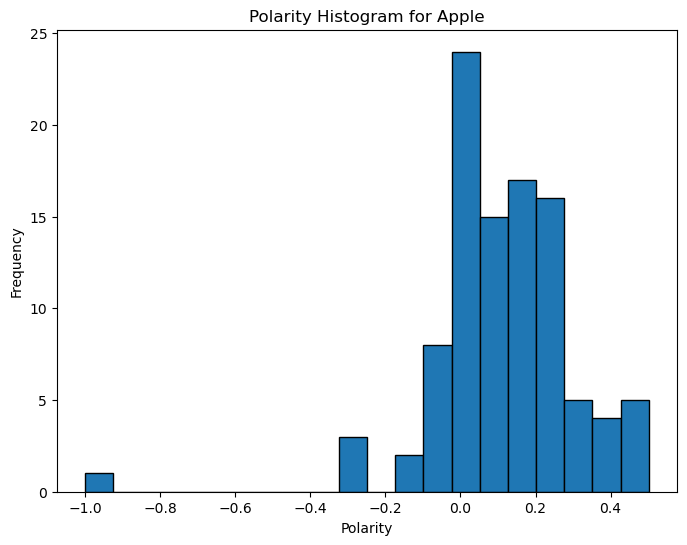

Sentiment Analysis Results for Apple:
                                                body      polarity  \
0  iFixit has good news and bad news about the iP...  5.551115e-17   
1  Filed under:\r\nByEmma Roth, a news writer who...  1.222222e-01   
2  Apple's 2023 iPhone event came and went almost...  1.681818e-01   
3  Fresh off of Apples Wanderlust event, Devindra...  3.000000e-01   
4  The iPhone 15 Pro is getting a performance boo...  1.787879e-01   

   subjectivity  
0      0.633333  
1      0.244444  
2      0.327273  
3      0.500000  
4      0.284848  




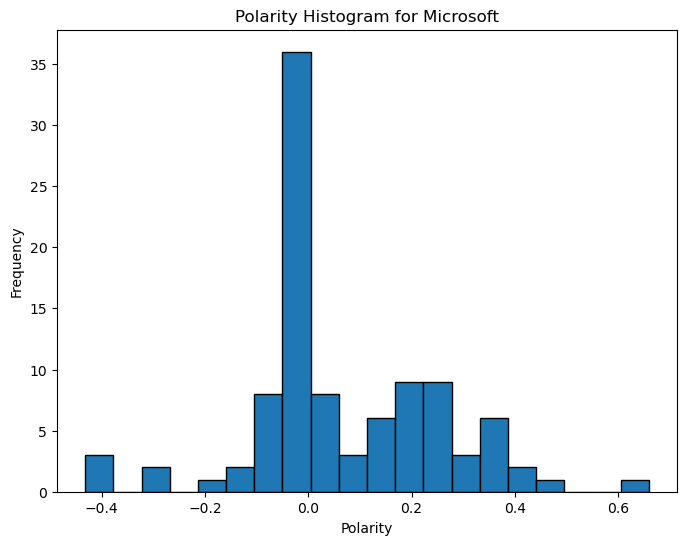

Sentiment Analysis Results for Microsoft:
                                                body  polarity  subjectivity
0  Microsoft is holding a 'special event' at 10 A...  0.176948      0.649351
1  Panos Panay is leaving Microsoft for Amazon\r\...  0.000000      0.000000
2  It was Microsoft's turn to step up to the plat... -0.278125      0.521875
3  Phil Spencer says acquiring Nintendo would be ...  0.000000      0.100000
4  Photo by Chris Welch / The Verge\r\n\n \n\n Mi...  0.049716      0.488636




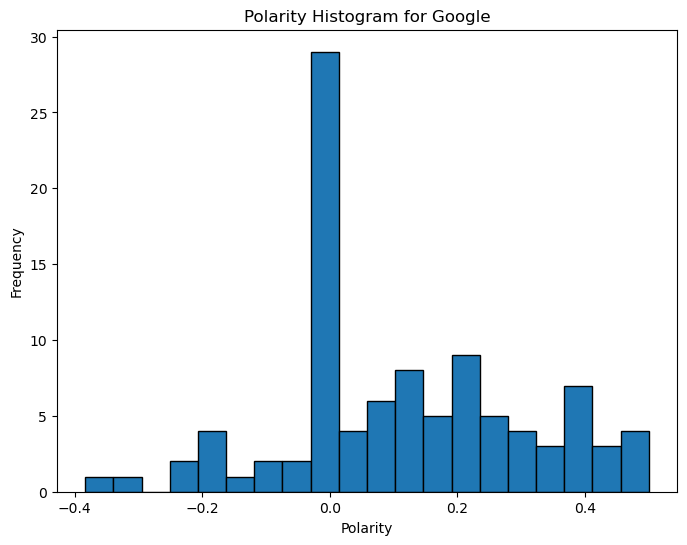

Sentiment Analysis Results for Google:
                                                body  polarity  subjectivity
0  It's Google's turn to step up to the plate and... -0.081818      0.427273
1  During its Made by Google event on Wednesday, ...  0.068182      0.227273
2  Google is continuing its shift away from smart...  0.214286      0.642857
3  Taylor Swift, as WIRED has reported in the pas...  0.125000      0.375000
4  With Apples iPhone 15 event now old news, its ... -0.008333      0.191667




In [73]:
companies = ['Apple', 'Microsoft', 'Google']  # Add more companies as needed

# Analyze sentiment for the list of companies
sentiment_results = analyze_companies_sentiment(API_KEY, companies)

# Store each company's data in a separate variable
company_dataframes = {}
for company, sentiments in sentiment_results.items():
    company_dataframes[company] = pd.DataFrame(sentiments)

    #Plot polarity histogram for the current company
    plt.figure(figsize=(8, 6))
    plt.hist(company_dataframes[company]['polarity'], bins=20, edgecolor='black')
    plt.title(f'Polarity Histogram for {company}')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Print the first few rows of the DataFrame
    print(f'Sentiment Analysis Results for {company}:')
    print(company_dataframes[company].head())
    print('\n')